# Teachbooks features in this book

## Reveal.JS slides

<div>
<iframe src="https://slides.com/nareshkumardevulapally/slides-ai/embed" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div>
<!-- 
<div>
<iframe src="/slides/slides_slides-ai/index.html" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div> -->

In [1]:
pwd

'/Users/naresh/Downloads/phd/final_docu/teachbooks_template/book/chapter_1'

In [2]:
import micropip
await micropip.install(["ipympl", 'plotly'])

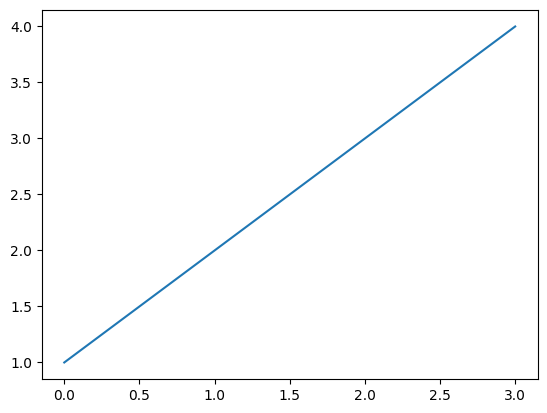

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.show()

In [4]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe'

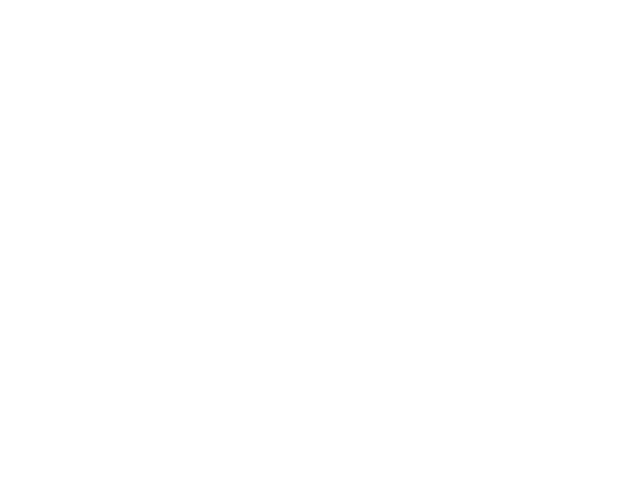

In [5]:
plt.figure()
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

def shape_functions(total_length, num_nodes, node_x):
    l = total_length / (num_nodes - 1)

    if node_x == 0:
        x = np.array([node_x, node_x + l])
        y = np.array([1.0, 0.0])
    elif node_x == total_length:
        x = np.array([node_x - l, node_x])
        y = np.array([0.0, 1.0])
    else:
        x = np.array([node_x - l, node_x, node_x + l])
        y = np.array([0.0, 1.0, 0.0])

    return x, y

def shape_functions_for_plot(num_nodes, beam_length = 15):

    x_positions = np.linspace(0, beam_length, num_nodes)

    data = {}

    for node_num, x_coords in enumerate(x_positions):

        x, y = shape_functions(beam_length, num_nodes, x_coords)
        data[node_num + 1] = {'x': x, 'y': y}

    return data

In [6]:
def linear_lagrange_shape_function(x, nodes_x_values, nodes_displacements):
    """
    Compute the linear Lagrange shape function for a given x.
    Args:
        x (float): The x-coordinate.
        x0 (float): Left node position.
        x1 (float): Right node position.
    Returns:
        float: The shape function value.
    """

    ratio = (x - nodes_x_values[0]) / (nodes_x_values[1] - nodes_x_values[0])

    return (1 - ratio) * nodes_displacements[0] + ratio * nodes_displacements[1]

def function(x):
    """
    Define the function to be plotted.
    Args:
        x (numpy.ndarray): Input values.
    Returns:
        numpy.ndarray: Corresponding function values.
    """
    return np.sin(x) * 0.14*x

def shape_functions_applied(num_elements):
    """
    Plot linear Lagrange shape functions on a beam.
    Args:
        num_elements (int): Number of elements (segments).
    """

    beam_length = 15

    num_nodes = num_elements + 1
    x_at_nodes = np.linspace(0, beam_length, num_nodes)

    y_at_nodes = function(x_at_nodes)

    x_data = np.linspace(0, beam_length, 1000)

    # Use NumPy to compute y_vals efficiently
    y_vals = np.zeros_like(x_data)

    for element_number in range(num_elements):
        mask = (x_at_nodes[element_number] <= x_data) & (x_data <= x_at_nodes[element_number + 1])
        y_vals[mask] = linear_lagrange_shape_function(x_data[mask], x_at_nodes[element_number:element_number + 2], y_at_nodes[element_number:element_number + 2])

    return x_data, function(x_data), y_vals

In [7]:
# Colors
grey = '#eeeeee'  # light grey fill

# Prepare all the graphs that are to be plotted
range_elements = np.concatenate((np.arange(1, 7, 1), np.arange(7, 35, 4), np.arange(35, 55, 8)))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Shape functions", "Exact and approximated solution"))

base_traces_left = 2  # Number of traces in the left plot that are always visible
base_traces_right = 0  # Number of traces in the right plot that are always visible

# Add traces to the subplots
x_data, y_data, y_vals = shape_functions_applied(10)

# Add left plot traces (Cumulative Influx and Cumulative Outflux)
fig.add_trace(
    go.Scatter(
        visible=True,  # Show for the first value of a
        x=x_data,
        y=y_data,
        # line=dict(color='#6a8ba4'),
        mode='lines',
        name='Exact solution'
    ),
    row=1,
    col=2
)


# Add traces to the subplots
for a in range_elements:

    x_data, y_data, y_vals = shape_functions_applied(a)

    fig.add_trace(
        go.Scatter(
            visible = True if a == range_elements[0] else False,  # Show for the first value of a
            x=x_data,
            y=y_vals,
            # line=dict(color='#FFA500'),
            mode='lines',
            name='Numerical solution'
        ),
        row=1,
        col=2
    )


# Add traces to the subplots
for a in range_elements:

    data = shape_functions_for_plot(a + 1)

    for i in range(1, a + 2):

        info = data[i]
        x, y = info['x'], info['y']

        # Add right plot traces (Cumulative Outflux for each 'a' value)
        fig.add_trace(
            go.Scatter(
                visible = True if a == range_elements[0] else False,
                x=x,
                y=y,
                mode='lines',
                name=f'Node shape for node {i}'
            ),
            row=1,
            col=1
        )

# Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):

    a = range_elements[i]
    visarray = [False] * len(fig.data)

    visarray[0] = True
    visarray[i + 1] = True

    start_of_second_plot = 1 + len(range_elements)

    if i==0:
        start_index=start_of_second_plot
    else:
        start_index = start_of_second_plot + np.sum(range_elements[0:i]) + i

    num_lines = range_elements[i] + 1
    end_index = start_index + num_lines

    visarray[start_index:end_index] = [True] * (end_index - start_index)
    
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(range_elements[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=0,  # Show the first value of 'a' initially
    currentvalue={"prefix": r"Number of elements: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Applying shape functions",
    legend_title="Legend",
    legend=dict(
        x=1.05,  # Adjust the legend position
        y=0.5
    )
)

fig.update_xaxes(title_text='x', row=1, col=1, range=[x_data[0], x_data[-1]])
fig.update_xaxes(title_text='x', row=1, col=2, range=[x_data[0], x_data[-1]])

# Update y-axis properties
fig.update_yaxes(title_text='Node shape value', row=1, col=1, range=[-0.1, 1.1])
fig.update_yaxes(title_text='y', row=1, col=2, range=[-2.1, 2.1])

fig.show()

<Figure size 640x480 with 0 Axes>

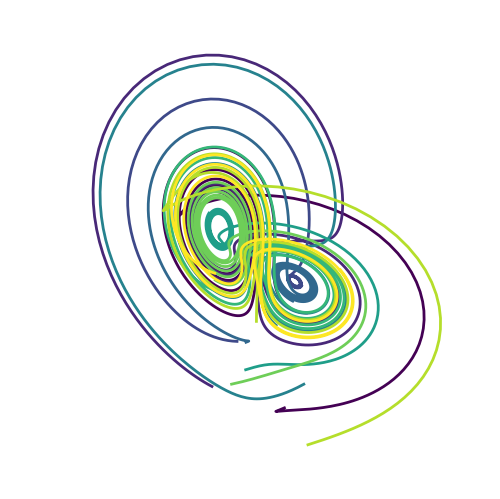

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

def solve_lorenz(
  N=10, angle=0.0, max_time=4.0, 
  sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 4.0), 
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)